In [83]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")

In [84]:
plystr_data = pd.read_csv("googleplaystore.csv")
plystr_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [85]:
plystr_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [86]:
plystr_data['Last Updated'] = pd.to_datetime(plystr_data['Last Updated'], format='%B %d, %Y', errors='coerce')
plystr_data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [87]:
plystr_data['Android Ver'] = plystr_data['Android Ver'].str.split(n=1, expand=True)
plystr_data['Android Ver']

0         4.0.3
1         4.0.3
2         4.0.3
3           4.2
4           4.4
          ...  
10836       4.1
10837       4.1
10838       2.2
10839    Varies
10840    Varies
Name: Android Ver, Length: 10841, dtype: object

In [88]:
def deal_with_abnormal_strings(data):
    data[data.str.isnumeric()==False]=-1
    data=data.astype(np.float32)
    return data


plystr_data['Installs'] = [x.strip().replace('+', '').replace(',','') for x in plystr_data['Installs']]
plystr_data['Installs'] = deal_with_abnormal_strings(plystr_data['Installs'])

plystr_data['Size'] = [x.strip().replace('M', '') for x in plystr_data['Size']]

In [89]:
plystr_data['Reviews'] = [x.strip().replace('M', '') for x in plystr_data['Reviews']]
plystr_data['Reviews'] = plystr_data['Reviews'].astype(np.float32)

In [90]:
plystr_data['Size'] = [x.strip().replace('Varies with device', '0').replace('k', '000').replace('+', '').replace(',', '') for x in plystr_data['Size']]
plystr_data['Size'] = plystr_data['Size'].astype(np.float32)

In [91]:
plystr_data['Price'] = [x.strip().replace('$', '').replace('Everyone', '') for x in plystr_data['Price']]
plystr_data['Price'] = deal_with_abnormal_strings(plystr_data['Price'])

In [94]:
plystr_data['Type'] = plystr_data['Type'].astype('category')
plystr_data['Content Rating'] = plystr_data['Content Rating'].astype('category')
plystr_data['Genres'] = plystr_data['Genres'].astype('category')
plystr_data['Category'] = plystr_data['Category'].astype('category')

In [96]:
plystr_data.dtypes

App                       object
Category                category
Rating                   float64
Reviews                  float32
Size                     float32
Installs                 float32
Type                    category
Price                    float32
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

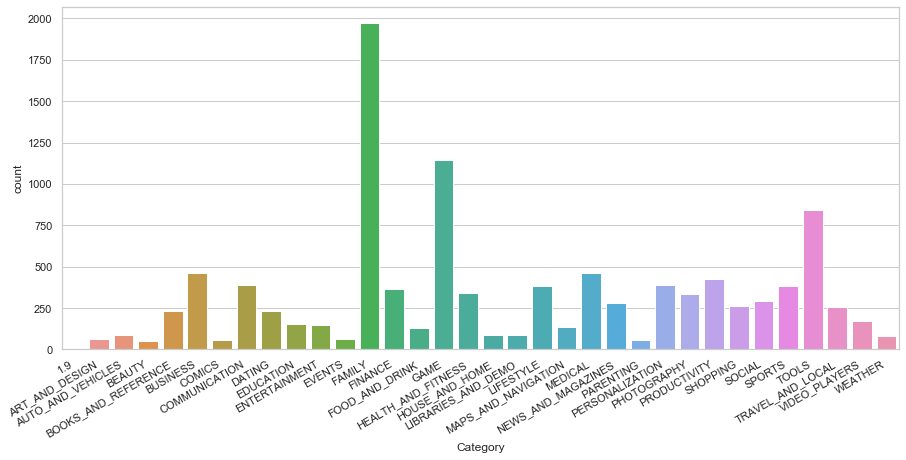

In [97]:
def plot_number_category():
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7)
    fig.autofmt_xdate()
    countplot=sns.categorical.countplot(plystr_data.Category,ax=ax)
    plt.show(countplot)

plot_number_category()

In [128]:
plystr_data.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')

,Category,Count
12,FAMILY,1972
15,GAME,1144
30,TOOLS,843
21,MEDICAL,463
5,BUSINESS,460
26,PRODUCTIVITY,424


In [116]:
pd.DataFrame(plystr_data.Category.value_counts()).rename(columns={'Category': 'Counts'}).head()

,Counts
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
